## CSDS 440 Programming 3: Boosting
### Calvin Vuong, Kris Zhao

#### Dependencies:
Make sure that the following modules are already installed as they are used throughout the notebook:
* matplotlib
* numpy
* argparse
* progressbar

The data is located in directory data/voting, data/volcanoes, data/spam.

#### (a) For any two problems and any learning algorithm, compare the accuracy of the boosted versions (30 iterations) to the base learners (1 iterations). Produce a table with the accuracies of the base learner and the boosted learner. Perform paired t-tests to determine if any of the ensemble learners are significantly better than the base learner with 95% confidence.

Accuracy of **dtree** learning algorithm (over 5 folds):

|  | Volcanoes | Spam |
| --- | --- | --- |
| Base Learner | 0.672 | 0.711 |
| Boosted Learner | 0.808 | 0.727 |

*Volcanoes*

Let $\delta$ and $\delta_i$ be the difference in accuracies between the unboosted and boosted learner (which are just one minus the difference in error).

| Fold | Base Learner Accuracy | Boosted Accuracy | $\delta$ |
| --- | --- | --- | ------- |
| 1 | 0.6711 | 0.7919 | -0.1208 |
| 2 | 0.6726 | 0.7668 | -0.0941 |
| 3 | 0.6726 | 0.8161 | -0.1435 |
| 4 | 0.6726 | 0.8071 | -0.1345 |
| 5 | 0.6726 | 0.8116 | -0.1390 |
| Average | 0.6723 | 0.7987 | -0.1264 |

In [93]:
import numpy as np
def std_mle(mean_error, errors):
    n = len(errors)
    squared_dev_sum = 0
    for e in errors:
        squared_dev_sum += (e - mean_error)**2
    return np.sqrt(squared_dev_sum / (n * (n-1)))
mean_delta = -0.12640323
s = std_mle(mean_delta, [-0.12080537, -0.0941704, -0.14349776, -0.13452915, -0.13901345])
print(s)

0.0089094403488777


The mean MLE difference in error $\delta = -0.1264$.

The MLE standard deviation in the difference in errors is $s = 0.008901$.

The t-distribution value for a 95% confidence interval with 4 degrees of freedom is $t_{0.95, 4} = 2.132$. 
(Note this value is different than the one in the class lecture example. The value presented in lecture as $t_{0.95,4}$ is actually the value for $t_{0.975,4}$).

The 95% confidence interval for the difference in error of the base learner and boosted learner classifiers is given by
$$
\delta \pm t_{0.95,4}s
$$

In [94]:
t = 2.132
print((mean_delta - t*s, mean_delta + t*s))

(-0.14539815682380727, -0.10740830317619275)


The 95% confidence interval for the difference in error of the base learner and the boosted learner is:
$$
[-0.1454, -.1074]
$$

Because 0 is not in the interval, we can say that the boosted learner is statistically better than the base learner on the volcanoes dataset, with 95% confidence.

*Spam*

| Fold | Base Learner Accuracy | Boosted Accuracy | $\delta$ |
| --- | --- | --- | ------- |
| 1 | 0.7137 | 0.7236 | -0.009834 |
| 2 | 0.7041 | 0.7198 | -0.01572 |
| 3 | 0.7137 | 0.7222 | -0.008563 |
| 4 | 0.7113 | 0.7269 | -0.01566 |
| 5 | 0.7125 | 0.7256 | -0.01311 |
| Average | 0.7111 | 0.7236 | -0.01258 |

In [96]:
mean_delta = -0.01257761
s = std_mle(mean_delta, [-0.00983409, -0.01572117, -0.00856359, -0.01565532, -0.01311388])
print(s)

0.0014710729482489983


The mean MLE difference in error $\delta = -0.01258$.

The MLE standard deviation in the difference in errors is $s = -0.001471$.

The t-distribution value for a 95% confidence interval with 4 degrees of freedom is $t_{0.95, 4} = 2.132$. 

In [97]:
t = 2.132
print((mean_delta - t*s, mean_delta + t*s))

(-0.015713937525666865, -0.009441282474333134)


The 95% confidence interval for the difference in error of the base learner and the boosted learner is:
$$
[-0.01571, -0.00944]
$$

Because 0 is not in the interval, we can say that the boosted learner is statistically better than the base learner on the spam dataset, with 95% confidence.

#### (b) For any two problems and any learning algorithm, evaluate how the accuracy of boosting changes with the number of iterations. Pick at least three iteration values between 2 and 50, and plot the accuracy on a graph. Do you see any difference by problem? 

Iteration values 1, 2, 5, 10, 20, 30, 40, 50 were picked.

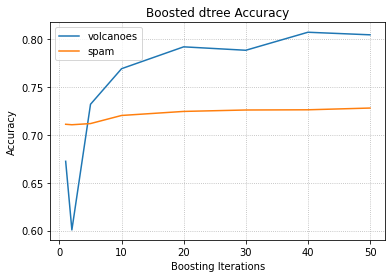

In [2]:
import matplotlib.pyplot as plt
# Read data file and return a list of (iterations, accuracy pairs)
def read_data(filename):
    iterations = -1
    accuracy = -1
    iterations_list = []
    accuracy_results = []
    f = open(filename, 'r')
    for line in f:
        if "Iterations" in line:
            iterations = int(line.split(" ")[0])
            iterations_list.append(iterations)
        elif "Accuracy" in line:
            accuracy = float(line.split(" ")[1])
            accuracy_results.append(accuracy)
    f.close()
    return iterations_list, accuracy_results

volcanoes_dtree = read_data("results/new/dtree_volcanoes.txt")
spam_dtree = read_data("results/new/dtree_spam.txt")
plt.title("Boosted dtree Accuracy")
plt.xlabel("Boosting Iterations")
plt.ylabel("Accuracy")
plt.grid(ls='dotted')
plt.plot(volcanoes_dtree[0], volcanoes_dtree[1], label='volcanoes')
plt.plot(spam_dtree[0], spam_dtree[1], label='spam')
plt.legend()

As expected, as we increase the number of boosting iterations, the accuracy of the ensemble classifier increases. There is a difference in accuracy improvement between the volcanoes and spam datasets; the accuracy improvement when learning on volcanoes is much better than when learning on spam. The accuracy of the dtree learner on the volcanoes dataset increases greatly, from 0.607 for 2 iterations to 0.818 for 50 iterations. The accuracy of the dtree learner on the spam dataset only increases slightly, from 0.711 for 2 iterations to 0.728 for 50 iterations. 

One possible explanation may be that on one dataset (such as volcanoes), the misclassified examples are inherently share some kind of underlying property that the classifier failed to learn this iteration, so when these examples' weights are increased for the next iteration, the next classifier will learn this property.  Conversely, it is possible the misclassified examples in another dataset (such as spam) do not share some underlying property, so even when these examples' weights are increased for the next iteration, the next learned classifier may not improve greatly.

### Research Extension

#### Motivation
One well known disadvantage of boosting algorithms is that they are sensitive to outlier examples. This comes from the fact that when learning, the boosting algorithm increases the weights of examples that were misclassified in the previous iteration's classifier and decreases the weights of correctly classified examples. Therefore, outlier examples that will not fit the target concept can be *repeatedly* misclassified and ultimately achieve a very large weight. With these large weights, the  classifiers trained in subsequent iterations will consider these examples as more and more important and try to find a concept that fits these outlier examples. However, by definition, outliers are not very representative of the novel examples the classifier would expect in the validation set or in practice. Therefore, the final ensemble can contain a large number of classifiers that are *overfit* to some outlier examples in the training set instead of fitting to other more representative examples. 

One possible approach to addressing this problem would be to perform a preprocessing step to remove outlier examples before any of the boosting occurs. However, this would likely require us to know *a priori* which examples are outliers so that we can remove them, which is generally not an easy task. A possible idea may be to come up with some kind of distance metric that measures the similarity between examples; examples whose distance is very far from all other examples can then be considered outliers and then removed. This too is a difficult thing to do and would vary largely between different problems. 

In our approach, we instead look at the weights of each example and the consecutive number of times each example is misclassified by the classifiers produced per boosting iteration. We use this to determine whether or not we consider an example an "outlier" and exclude subsequent iterations' classifiers from training on it.

#### Hypothesis and Testing
After every example weight update in the boosting algorithm, if we take the examples that were:
1. misclassified this iteration and for the last three iterations of boosting, and
2. have an example weight that is more than 2 standard deviations larger than the mean example weight

and *we set the weight of such examples to 0*, then the accuracy and other performance measures (precision, recall, area under ROC) will be greater compared to the unmodified version of boosting. 

The two criteria outlined as (1) and (2) above will define the outlier examples. Having an example weight that is more than 2 standard deviations greater than the mean example weight suggests that this example is constantly being misclassified and should be removed from consideration in future learning to reduce overfitting. However, since we do not want to be too aggressive and want to give sufficient chance for boosting to produce a classifier capable of handling previously misclassified examples, we add an extra condition that an exmample has to be misclassified more than 3 times consecutiviely.

This hypothesis will be tested on the volcanoes and spam datasets using *dtree* and *logreg* as the base learners. The "unmodified" boosting algorithm presented in lecture will be compared to the boosting algorithm with the above modifications. Both algorithms will run with 30 iterations of boosting and use 5-fold cross validation. Paired t-test will be performed to determine if the modified boosting algorithm results in any statistically significant difference between both algorithms, with a 95% confidence.

#### Results
The boosted `dtree` algorithm will create an ensemble of depth 1 trees, using information gain as the attribute selection heuristic. The boosted `logreg` algorithm will create an ensemble of weights that will be learned using gradient descent on an objective function that uses $\lambda = 0.1$ as the weight penalty parameter.

The unmodified and modified versions of boosting were run using the same seed, so the composition of each fold in the cross validation is identical across the different versions of boosting.

**dtree Results**

Text(0.5, 0.98, '$\\bf{dtree}$ Performance using the Unmodified and Modified Boosting Algorithms')

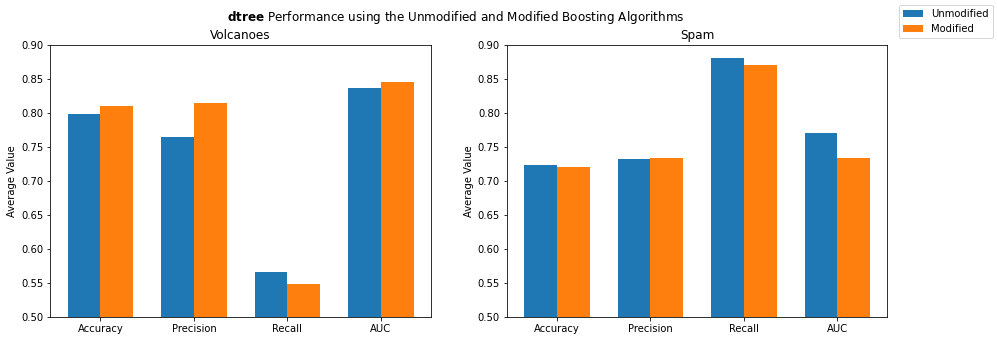

In [79]:
# accuracy, precision, recall, AUC
vol_dtree_boost = [0.7987, 0.7652, 0.5663,  0.8368]
vol_dtree_boost_plus = [0.8108,  0.8149, 0.5485, 0.8461]

spam_dtree_boost = [0.7236,  0.7320, 0.8805, 0.7711]
spam_dtree_boost_plus = [0.7208, 0.7332, 0.8703, 0.7334]

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
labels = ['Accuracy', 'Precision', 'Recall', 'AUC']
x = np.arange(4)
width = .35
ax[0].bar(x-width/2, vol_dtree_boost, width, label='Unmodified')
ax[0].bar(x+width/2, vol_dtree_boost_plus, width, label='Modified')
ax[0].set_title('Volcanoes')
ax[0].set_ylabel('Average Value')
ax[0].set_xticks(x)
ax[0].set_xticklabels(labels)
ax[0].set_ylim(0.5, 0.90)

ax[1].bar(x-width/2, spam_dtree_boost, width, label='Unmodified')
ax[1].bar(x+width/2, spam_dtree_boost_plus, width, label='Modified')
ax[1].set_title('Spam')
ax[1].set_ylabel('Average Value')
ax[1].set_xticks(x)
ax[1].set_xticklabels(labels)
ax[1].set_ylim(0.5, 0.90)

handles, l = ax[0].get_legend_handles_labels()
fig.legend(handles, l)
fig.suptitle(r"$\bf{dtree}$ " + 'Performance using the Unmodified and Modified Boosting Algorithms')

On the volcanoes dataset, using dtree as the base learner, boosting with modifications performs modestly better in terms of accuracy, precision, and area under the ROC curve (AUC) compared to the boosting without modifications. The accuracy increased from .799 (unmodified) to .811 (modified). In terms of recall, the modified boosting learner actually performs worse. The greatest improvement was in the precision. 

On the spam dataest, using dtree as the base learner, boosting with modifications generally does *not* perform better compared to the boosting without modifications. The accuracy decreased from .724 (unmodified) to .721 (modified). Introducing the boosting modifications appears to result in a sizeable decrease in recall and AUC without improvements in accuracy and precision.

We can perform a t-test on the accuracy of the modified and unmodified boosted dtree learners to see if the improvements in accuracy are stasticially significant.

*Volcanoes*

| Fold | Unmodified Accuracy | Modified Accuracy | $\delta$ |
| --- | --- | --- | ------- |
| 1 | 0.7919 | 0.8322 | -0.0402 |
| 2 | 0.7668 | 0.7960 | -0.0291 |
| 3 | 0.8161 | 0.8027 | 0.0135 |
| 4 | 0.8071 | 0.8139 | -0.0067 |
| 5 | 0.8116 | 0.8094 | 0.0022 |
| Average | 0.7987 | 0.8108 | -0.0121 |

In [90]:
t = 2.132 # for 95% CI
mean_delta = -0.01208957
s = std_mle(mean_delta, [-0.04026846, -0.02914798, 0.01345291, -0.00672646, 0.00224215])
print((mean_delta - t*s, mean_delta + t*s))

(-0.03325775676298737, 0.00907861676298737)


Because 0 is contained in this interval, we *cannot* say with 95% confidence that the modified boosting algorithm has a higher accuracy than the unmodified boosting algorithm, on the volcanoes dataset using dtree. The apparent increase in accuracy may be due to chance rather than a difference in the learning algorithm.

*Spam*

| Fold | Unmodified Accuracy | Modified Accuracy | $\delta$ |
| --- | --- | --- | ------- |
| 1 | 0.7236 | 0.7244 | -0.0009 |
| 2 | 0.7198 | 0.7136 | 0.0062 |
| 3 | 0.7222 | 0.7226 | -0.0003 |
| 4 | 0.7270 | 0.7211 | 0.0058 |
| 5 | 0.7256 | 0.7222 | 0.0033 |
| Average | 0.7236 | 0.7208 | 0.0028 |


In [98]:
t = 2.132 # for 95% CI
mean_delta = 0.00283666
s = std_mle(mean_delta, [-0.00086968, 0.00622157, -0.00033452, 0.00582057, 0.00334538])
print((mean_delta - t*s, mean_delta + t*s))

(-0.0003404302555384876, 0.006013750255538488)


Because 0 is contained in this interval, we *cannot* say with 95% confidence that the modified boosting algorithm has a lower accuracy than the unmodified boosting algorithm, on the spam dataset using dtree. The apparent decrease in accuracy may be due to chance rather than a difference in the learning algorithm.

**logreg Results**

Text(0.5, 0.98, '$\\bf{logreg}$ Performance using the Unmodified and Modified Boosting Algorithms')

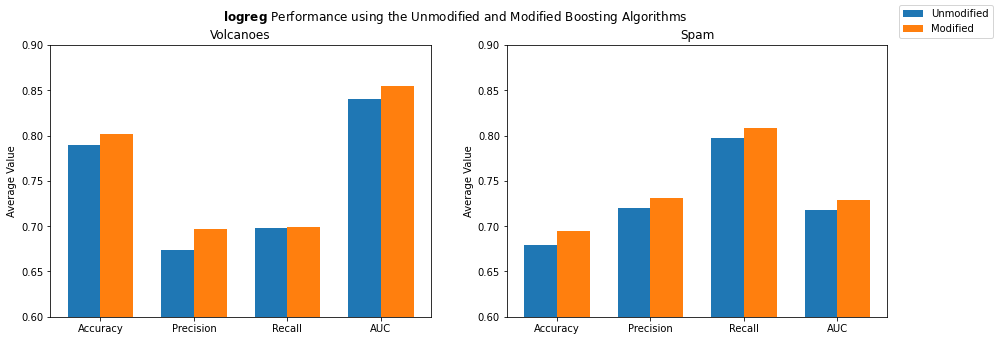

In [83]:
vol_logreg_boost = [0.7898, 0.6734, 0.6976, 0.8408]
vol_logreg_boost_plus = [0.8018, 0.6974, 0.6990,  0.8550]

spam_logreg_boost = [0.6789, 0.7197, 0.7971, 0.7182]
spam_logreg_boost_plus = [0.6943, 0.7314, 0.8083, 0.7288]

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
labels = ['Accuracy', 'Precision', 'Recall', 'AUC']
x = np.arange(4)
width = .35
ax[0].bar(x-width/2, vol_logreg_boost, width, label='Unmodified')
ax[0].bar(x+width/2, vol_logreg_boost_plus, width, label='Modified')
ax[0].set_title('Volcanoes')
ax[0].set_ylabel('Average Value')
ax[0].set_xticks(x)
ax[0].set_xticklabels(labels)
ax[0].set_ylim(0.6, 0.90)

ax[1].bar(x-width/2, spam_logreg_boost, width, label='Unmodified')
ax[1].bar(x+width/2, spam_logreg_boost_plus, width, label='Modified')
ax[1].set_title('Spam')
ax[1].set_ylabel('Average Value')
ax[1].set_xticks(x)
ax[1].set_xticklabels(labels)
ax[1].set_ylim(0.6, 0.90)

handles, l = ax[0].get_legend_handles_labels()
fig.legend(handles, l)
fig.suptitle(r"$\bf{logreg}$ " + 'Performance using the Unmodified and Modified Boosting Algorithms')

On the volcanoes dataset, using logreg as the base learner, boosting with modifications modestly but consistently performs better in terms of all four metrics compared to the boosting without modifications. The accuracy increased from .790 (unmodified) to .802 (modified). The greatest improvement was in the precision and the least amount of improvement was in the recall.

On the spam dataest, using logreg as the base learner, boosting with modifications consistently performs better compared to the boosting without modifications. The accuracy increased from .679 (unmodified) to 0.694 (modified). On this dataset, it appears that all of the metrics showed a similar improvement, with no one metric improving much more compared to the other metrics.

We can perform a t-test on the accuracy of the modified and unmodified boosted logreg learners to see if the improvements in accuracy are stasticially significant.

*Volcanoes*

| Fold | Unmodified Accuracy | Modified Accuracy | $\delta$ |
| --- | --- | --- | ------- |
| 1 | 0.8143 | 0.8389 | -0.0246 |
| 2 | 0.7646 | 0.7892 | -0.0247 |
| 3 | 0.7937 | 0.8161 | -0.0224 |
| 4 | 0.7825 | 0.7848 | -0.0022 |
| 5 | 0.7937 | 0.7803 | 0.0134 |
| Average | 0.7898 | 0.8019 | -0.0121 |

Because 0 is contained in this interval, we *cannot* say with 95% confidence that the modified boosting algorithm has a higher accuracy than the unmodified boosting algorithm, on the volcanoes dataset. The apparent increase in accuracy may be due to chance rather than a difference in the learning algorithm.

In [101]:
t = 2.132 # for 95% CI
mean_delta = -0.01209659
s = std_mle(mean_delta, [-0.0246085, -0.02466368, -0.02242152, -0.00224215, 0.01345291])
print((mean_delta - t*s, mean_delta + t*s))

(-0.028410017900890216, 0.004216837900890214)


Because 0 is contained in this interval, we *cannot* say with 95% confidence that the modified boosting algorithm has a higher accuracy than the unmodified boosting algorithm, on the spam dataset using logreg. The apparent increase in accuracy may be due to chance rather than a difference in the learning algorithm.

*Spam*

| Fold | Unmodified Accuracy | Modified Accuracy | $\delta$ |
| --- | --- | --- | ------- |
| 1 | 0.6805 | 0.6955 | -0.0151 |
| 2 | 0.6622 | 0.6996 | -0.0374 |
| 3 | 0.6805 | 0.6932 | -0.0126 |
| 4 | 0.6839 | 0.6949 | -0.0110 |
| 5 | 0.6873 | 0.6881 | -0.0008 |
| Average | 0.6789 | 0.6943 | -0.0154 |

In [102]:
t = 2.132 # for 95% CI
mean_delta = -0.01537363
s = std_mle(mean_delta, [-0.01505218, -0.03739631, -0.01264468, -0.0109721, -0.00080289])
print((mean_delta - t*s, mean_delta + t*s))

(-0.028203141400902822, -0.002544118599097176)


Because 0 is *not* contained in this interval, we can say with 95% confidence that the modified boosting algorithm has a higher accuracy than the unmodified boosting algorithm, on the spam dataset using logreg. This means that the observed accuracy improvements is unlikely due to chance but rather due to an actual improvement in the learning algorithm itself.

#### Discussion:
##### Spam vs volcanoes (logreg):
When considering the results of logreg in our exploration, we can notice that the improvement for spam was statistically significant while volcanoes was not. While specific datasets may vary, we can consider what differences the two datasets have which may lead to this outcome. We can notice that spam has a lot of examples with a smaller number of attributes whereas volcanoes has many more features, but fewer examples.

Given that our exploration sought to limit ensemble overfitting of outliers by "zeroing" the weight of these examples, it is possible that the number of examples we removed from spam was correct for targetting the outliers while still leaving enough examples for the classifier in each fold. For volcanoes this may not have been the case. Instead we were not able to benefit consistently enough from removing examples that were consistently misclassified. Importantly, looking at the difference in accuracies for each fold, we find that it was quite varied (we were not able to consistently improve) thus failing our *t-test*. This might be the result of a poorly chosen threshold for zeroing example weights; in some folds, the classification removed outlier structures, but in others, it removed examples that produced valuable information about the target concept. This could imply that with fewer examples, volcanoes required a higher threshold so we don't leave open the possibility to remove too many examples from consideration.

##### Improvements in logreg but not dtree:
Next, comparing the two algorithms of logreg and dtree, we find that dtree did not benefit as much as logreg (in fact, for spam, the values accuracy and AUC actually decreased). In order to see why this may be the case we can consider the ensemble classifier that was learned with dtree. dtree chooses the attribute to split on based on its information gain (as determined by example weights).Therefore the classifier produced by each iteration will classify examples based on an individual attribute. Given this, the small modifications into the actual attribute information gain (as a result of zeroing out some of the example weights) may not change the attribute with highest information gain. This is especially true if only a few examples are zeroed out. This will result in the same classifier as the unmodified boosting algorithm, as it is still splitting on the same attribute. 

For example, consider an iteration of the the unmodified dtree boosting where X and Y are attributes. IG(X) = 0.50 and IG(Y) = 0.40. Now consider the same iteration in the modified version of dtree boosting, where the zeroing out of some example weights results in IG(X) = 0.50 and IG(Y) = 0.45. Still IG(X) > IG(Y). In such an example, our modifications to the example weights would still result in the same classifier: a decision stump that splits on X. 

In contrast, with logreg, we are stil performing gradient descent over all examples. Given this, each example (and subsequently, those whose weights were zeroed out by misclassification) will have some effect on updating the gradient and final classifier (no matter how small). Furthermore even with small changes in example weights, each logistic regression weight update during gradient descent can compound these changes leading to individual classifiers changing its classification of certain examples, compared to the unmodified logreg classifiers. Either way, by having this modification in the example weights (zeroing), the logreg results are forcing some change in the classifier.

##### Resolution of the thresholding values:
The previous two dicussion brings back a well known detriment of fixed thresholds. Like in early stopping, determining ONE value as a stopping criterion is difficult. Similarly it is incredibly difficult to determine what the misclassification threshold should be (is it 3, or should it be greater? or should it vary based on the exmaple set size?).

Back in the discussion for Spam vs Volcanoes, it is possible that the spam dataset (which has a much greater number of examples), the misclassification threshold of 3 was great enough to correctly "identify" outliers to zero out, whereas this was not the case for volcanoes where the misclassification for a smaller sized dataset did not play nicely and would incorrectly limit the number of examples cutting out important information.

##### Effect of the base learner:
Another important case to consider when comparing the base learners and the misclassificaiton threshold builds off of the previous discussion of incorrectly set thresholds. Since we count the consecutive misclassifications to determine when to zero out example weights, given a base learner which is very poor, it is possible that the modified boosting algorithm begins "cutting" off examples before the next iteration's classifier has a chance to learn to correctly classify. In this example the classifier could then potentially set large sets of examples to have a weight of 0 and neglect important information. 


#### Future Extensions
##### Explore the number of misclassifications.
Given what we know about thresholding, I believe an important future extension to this project would be to consider *how* the misclassification threshold and the high example weights threshold is set. For our research extension, the parameters used were 3 consecutive misclassifications and 2 standard deviations above the mean of the example weights; these parameters were chosen a priori and without empirical evidence. It is also worth exploring the relationship bewteen these parameters and the size of the dataset. For example, the threshold for setting misclassified example weights to 0 could grow proportional to the example set. Similarly, this parameter for the misclassification threshold could be a value we learn while building our ensemble in similar ways to modifying and updating weights.

Alternatively, the threshold could be explored in its relationship to the number of iterations. For example, at some iteration x, if the example has been misclassified some number proportional to x times, then we let the weight go to zero. By considering the iteration we are on, we can more accurately target the outliers (which we expect never or rarely to be classified correctly) while providing the iterations necessary to correct for real but mislassified examples.